# Interactoma de la senescencia celular

Se realizó una búsqueda de las proteínas involucradas en la senescencia celular en la base de datos KEGG y Reactome, unificamos los datos de las proteínas y buscamos los genes que codifican para dichas proteínas. Obtuvimos un total de 254 genes. Posteriormente se extrajeron los genes y se cargaron en la plataforma STRING y se construyó la red de interacción o interactoma A.
Posteriormente construimos los datos en archivo .csv para analizarlos a Python.

Una vez en Python, se descargó el set de datos para analizar la red.

Cargar librerias: -pandas- para importar achivos, la libreria -networkx- para crear la red y la libreria -matplilib- para visualizar y analizar la red, cargaremos -numpy- para realizar graficos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx.algorithms as algs

Importar el archivo CSV y darle un nombre (en este caso NetSRK) usaremos -pandas-

In [2]:
NetSRK = pd.read_csv("e:/Users/Alberto/Desktop/Network_String_Reac_Kegg_csv.csv")

In [3]:
NetSRK

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,ACD,TERF2,9606.ENSP00000483117,9606.ENSP00000254942,0.0,0.0,0.000,0.000,0.067,0.922,0.720,0.993,0.999
1,ACD,CCNA1,9606.ENSP00000483117,9606.ENSP00000255465,0.0,0.0,0.000,0.000,0.000,0.000,0.400,0.000,0.400
2,ACD,NBN,9606.ENSP00000483117,9606.ENSP00000265433,0.0,0.0,0.000,0.000,0.000,0.000,0.500,0.049,0.504
3,ACD,CDK2,9606.ENSP00000483117,9606.ENSP00000266970,0.0,0.0,0.000,0.000,0.049,0.000,0.400,0.000,0.405
4,ACD,TINF2,9606.ENSP00000483117,9606.ENSP00000267415,0.0,0.0,0.000,0.000,0.055,0.991,0.800,0.999,0.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,UBE2S,VDAC1,9606.ENSP00000264552,9606.ENSP00000378487,0.0,0.0,0.000,0.000,0.124,0.046,0.000,0.389,0.445
6516,VDAC1,VDAC2,9606.ENSP00000378487,9606.ENSP00000361635,0.0,0.0,0.051,0.978,0.525,0.780,0.967,0.574,0.998
6517,VDAC1,VDAC3,9606.ENSP00000378487,9606.ENSP00000428845,0.0,0.0,0.055,0.970,0.191,0.710,0.967,0.433,0.995
6518,VDAC2,VDAC3,9606.ENSP00000361635,9606.ENSP00000428845,0.0,0.0,0.053,0.975,0.269,0.715,0.967,0.629,0.997


In [4]:
print(NetSRK)

       #node1    node2       node1_string_id       node2_string_id  \
0         ACD    TERF2  9606.ENSP00000483117  9606.ENSP00000254942   
1         ACD    CCNA1  9606.ENSP00000483117  9606.ENSP00000255465   
2         ACD      NBN  9606.ENSP00000483117  9606.ENSP00000265433   
3         ACD     CDK2  9606.ENSP00000483117  9606.ENSP00000266970   
4         ACD    TINF2  9606.ENSP00000483117  9606.ENSP00000267415   
...       ...      ...                   ...                   ...   
6515    UBE2S    VDAC1  9606.ENSP00000264552  9606.ENSP00000378487   
6516    VDAC1    VDAC2  9606.ENSP00000378487  9606.ENSP00000361635   
6517    VDAC1    VDAC3  9606.ENSP00000378487  9606.ENSP00000428845   
6518    VDAC2    VDAC3  9606.ENSP00000361635  9606.ENSP00000428845   
6519  ZFP36L1  ZFP36L2  9606.ENSP00000337386  9606.ENSP00000282388   

      neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                            0.0          0.0                      0.000   
1      

Generar la red, usaremos -networkx-

In [5]:
RED = nx.DiGraph
RED = nx.from_pandas_edgelist(NetSRK, source = "#node1", target = "node2", edge_attr = ["automated_textmining", "database_annotated", "experimentally_determined_interaction", "coexpression", "combined_score"])

### Ya creada la red comenzaremos el análisis

In [6]:
RED.nodes()

NodeView(('ACD', 'TERF2', 'CCNA1', 'NBN', 'CDK2', 'TINF2', 'H2BC1', 'TERF1', 'H2BC5', 'TERF2IP', 'H2AZ2', 'H2BC4', 'MRE11', 'H2AC14', 'H2AC20', 'H2AC7', 'H2BC12', 'POT1', 'H3-4', 'H2BC21', 'H2AC18', 'H2BC13', 'H2AC6', 'RAD50', 'H2AX', 'H2AJ', 'H2BC11', 'H2BC17', 'H2BC14', 'H2BC9', 'CCNA2', 'H2BC3', 'H2BC15', 'H2AB1', 'ago-01', 'SIRT1', 'CCND1', 'MAPK14', 'KDM6B', 'PHC2', 'CDK4', 'CDKN2C', 'E2F3', 'CDK6', 'TP53', 'CBX8', 'CBX4', 'CDKN2B', 'PPID', 'CBX2', 'SUZ12', 'EZH2', 'SP1', 'MAPK11', 'TNRC6C', 'EED', 'FOXO3', 'EIF4EBP1', 'E2F1', 'ETS2', 'E2F2', 'RNF2', 'VENTX', 'JUN', 'PTEN', 'ago-03', 'CBX6', 'TFDP2', 'PHC3', 'CDKN2D', 'RBBP7', 'PHC1', 'ETS1', 'MAPKAPK3', 'RING1', 'RBBP4', 'BMI1', 'CDKN2A', 'MYC', 'TFDP1', 'MOV10', 'ago-04', 'TNRC6B', 'TNRC6A', 'AKT1', 'MAPK1', 'TSC2', 'TGFB1', 'SERPINE1', 'NFKB1', 'CDKN1B', 'TGFB3', 'RRAS', 'RRAS2', 'CCNB1', 'MDM2', 'LMNB1', 'RBL2', 'SMAD2', 'RHEB', 'CCNE1', 'MAP2K2', 'MAPK3', 'IL1A', 'PIK3CA', 'UBE2S', 'STAT3', 'RB1', 'RPS27A', 'ATM', 'TSC1', 'MA

Conocer las aristas o interacciones de la red.

In [7]:
RED.edges()

EdgeView([('ACD', 'TERF2'), ('ACD', 'CCNA1'), ('ACD', 'NBN'), ('ACD', 'CDK2'), ('ACD', 'TINF2'), ('ACD', 'H2BC1'), ('ACD', 'TERF1'), ('ACD', 'H2BC5'), ('ACD', 'TERF2IP'), ('ACD', 'H2AZ2'), ('ACD', 'H2BC4'), ('ACD', 'MRE11'), ('ACD', 'H2AC14'), ('ACD', 'H2AC20'), ('ACD', 'H2AC7'), ('ACD', 'H2BC12'), ('ACD', 'POT1'), ('ACD', 'H3-4'), ('ACD', 'H2BC21'), ('ACD', 'H2AC18'), ('ACD', 'H2BC13'), ('ACD', 'H2AC6'), ('ACD', 'RAD50'), ('ACD', 'H2AX'), ('ACD', 'H2AJ'), ('ACD', 'H2BC11'), ('ACD', 'H2BC17'), ('ACD', 'H2BC14'), ('ACD', 'H2BC9'), ('ACD', 'CCNA2'), ('ACD', 'H2BC3'), ('ACD', 'H2BC15'), ('ACD', 'H2AB1'), ('TERF2', 'ATM'), ('TERF2', 'CCNA1'), ('TERF2', 'CCNA2'), ('TERF2', 'CDK2'), ('TERF2', 'CHEK2'), ('TERF2', 'H2AB1'), ('TERF2', 'H2AC14'), ('TERF2', 'H2AC18'), ('TERF2', 'H2AC20'), ('TERF2', 'H2AC6'), ('TERF2', 'H2AC7'), ('TERF2', 'H2AJ'), ('TERF2', 'H2AX'), ('TERF2', 'H2AZ2'), ('TERF2', 'H2BC1'), ('TERF2', 'H2BC11'), ('TERF2', 'H2BC12'), ('TERF2', 'H2BC13'), ('TERF2', 'H2BC14'), ('TERF2',

Para visualizar la red usaremos -matplotlib-

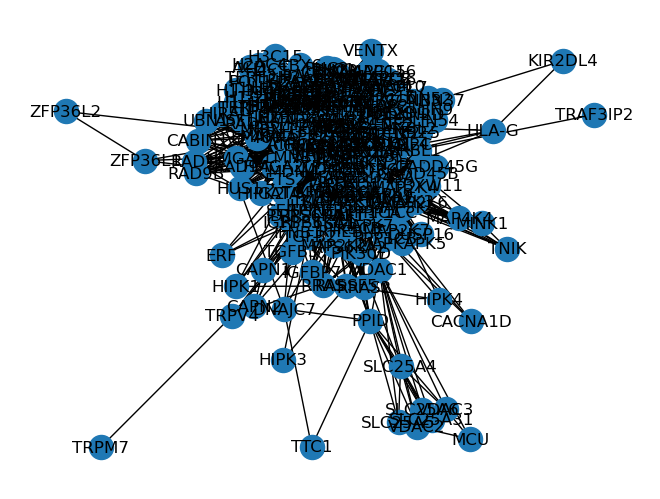

In [8]:
nx.draw(RED, with_labels=True)
plt.show()

### Alternatiba de visualización

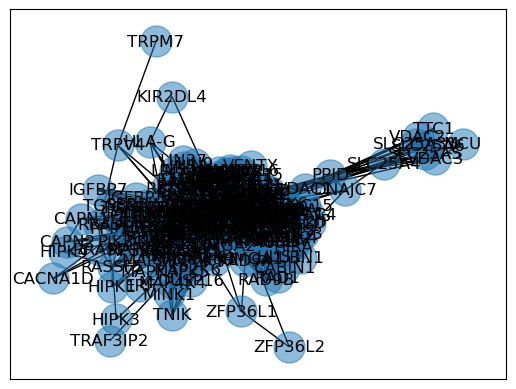

In [9]:
pos = nx.spring_layout(RED)

nx.draw_networkx_nodes(RED, pos, node_size=500, alpha=0.5)
nx.draw_networkx_edges(RED, pos)
nx.draw_networkx_labels(RED, pos)
plt.show()

para ver la red en forma circular

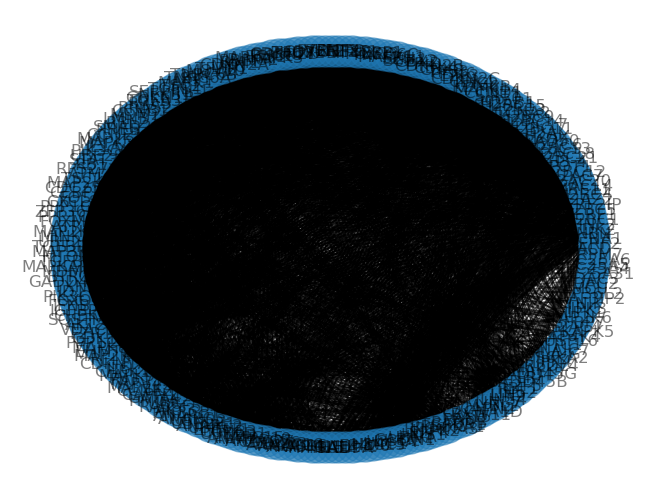

In [10]:
nx.draw_circular(RED, node_size=500, alpha=0.5, with_labels=True)

Para ver la red de forma random

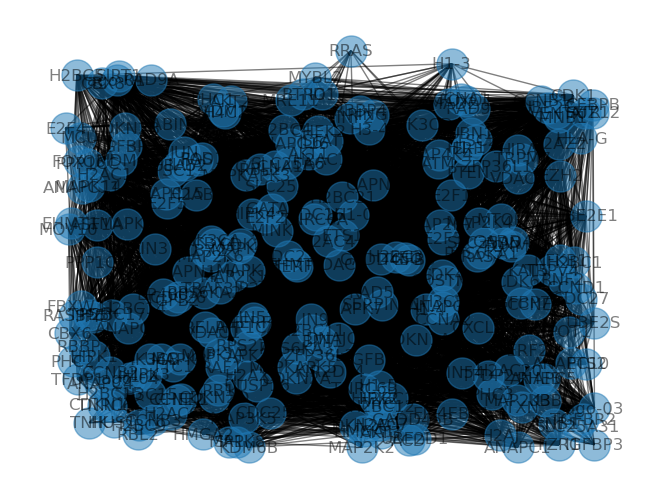

In [11]:
nx.draw_random(RED, node_size=500, alpha=0.5, with_labels=True)

para ver la red en forma kamada

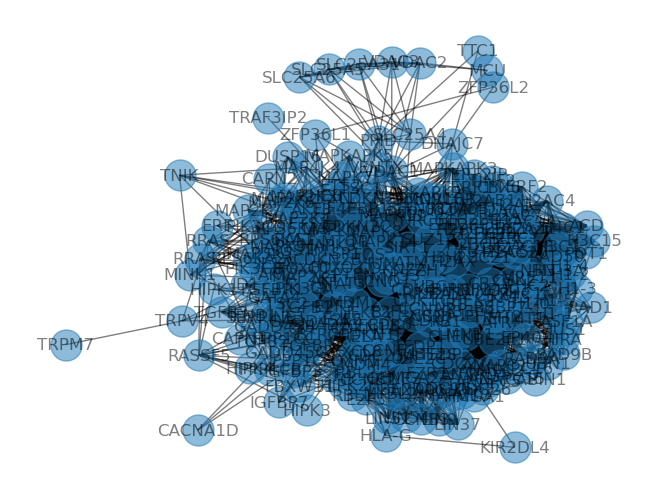

In [12]:
nx.draw_kamada_kawai(RED, node_size=500, alpha=0.5, with_labels=True)

para ver la red en forma networkx

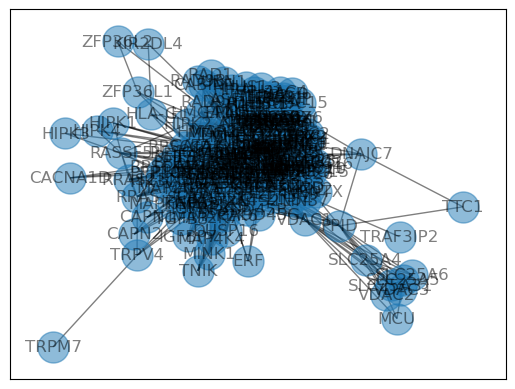

In [13]:
nx.draw_networkx(RED, node_size=500, alpha=0.5, with_labels=True)

para ver la red por nodos

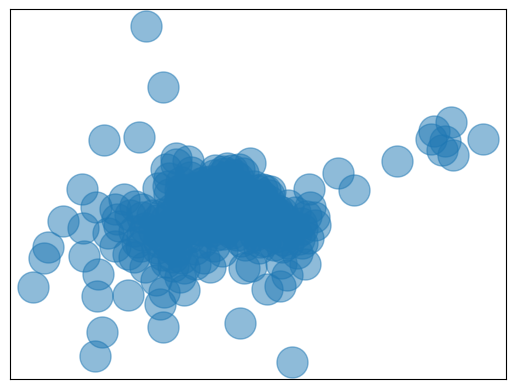

In [11]:
nx.draw_networkx_nodes(RED, pos, node_size=500, alpha=0.5)

para ver la red por aristas

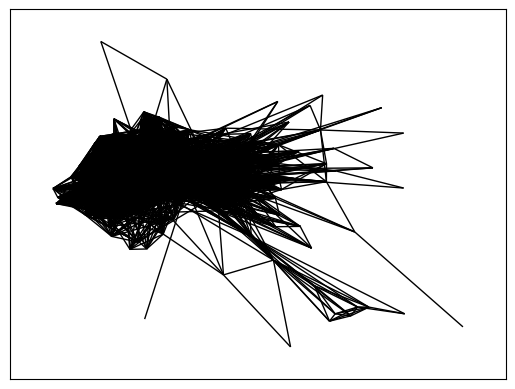

In [13]:
nx.draw_networkx_edges(RED, pos)

Para ver la red de forma spectral, este plot nos permite ver la alta condensación de la red.

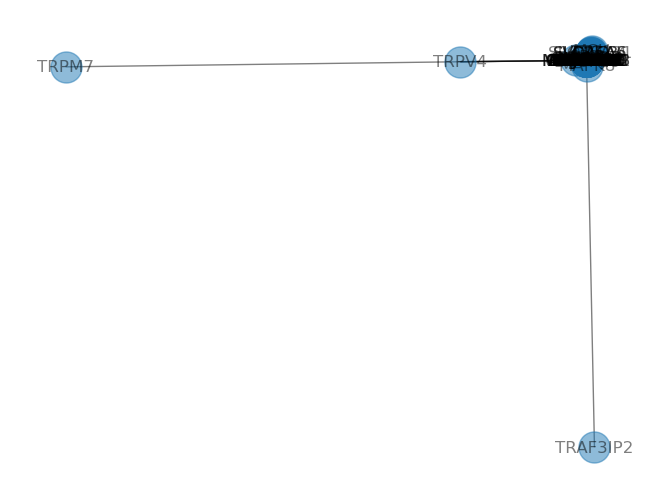

In [12]:
nx.draw_spectral(RED, node_size=500, alpha=0.5, with_labels=True)

para ver la red de forma spring

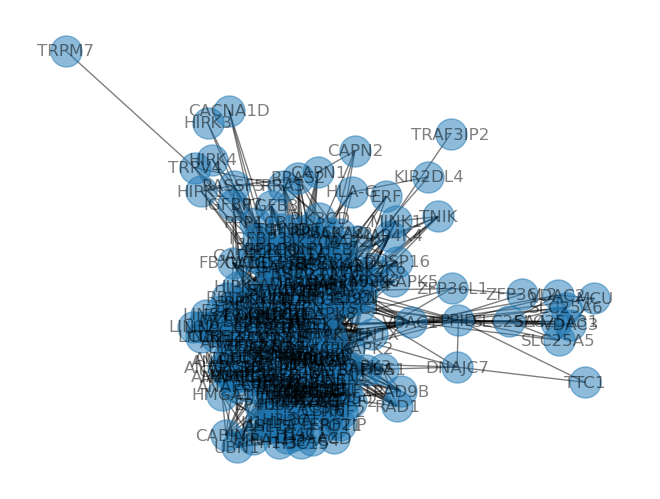

In [13]:
nx.draw_spring(RED, node_size=500, alpha=0.5, with_labels=True)

### Analizar la red

edge-label, par ver los datos de las interacciones.

{('ACD',
  'TERF2'): Text(0.27698885638221454, -0.08543792987797982, "{'automated_textmining': 0.993, 'database_annotated': 0.72, 'experimentally_determined_interaction': 0.922, 'coexpression': 0.067, 'combined_score': 0.999}"),
 ('ACD',
  'CCNA1'): Text(0.16845513429958198, 0.01959610307643763, "{'automated_textmining': 0.0, 'database_annotated': 0.4, 'experimentally_determined_interaction': 0.0, 'coexpression': 0.0, 'combined_score': 0.4}"),
 ('ACD',
  'NBN'): Text(0.23158017293397498, -0.0842634244392942, "{'automated_textmining': 0.049, 'database_annotated': 0.5, 'experimentally_determined_interaction': 0.0, 'coexpression': 0.0, 'combined_score': 0.504}"),
 ('ACD',
  'CDK2'): Text(0.16044582664852763, 0.009460161580438824, "{'automated_textmining': 0.0, 'database_annotated': 0.4, 'experimentally_determined_interaction': 0.0, 'coexpression': 0.049, 'combined_score': 0.405}"),
 ('ACD',
  'TINF2'): Text(0.29011791618865235, -0.06016272865906423, "{'automated_textmining': 0.999, 'datab

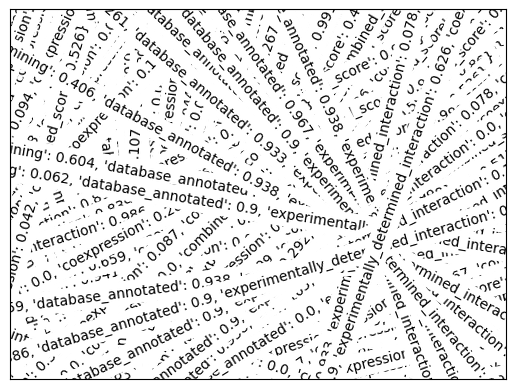

In [14]:
nx.draw_networkx_edge_labels(RED, pos)

Numero de nodos

In [15]:
RED.number_of_nodes()

249

numero de aristas

In [16]:
RED.number_of_edges()

6520

Tamaño de la red

In [17]:
RED.size()

6520

Grado de conexión de los nodos

In [18]:
nx.degree(RED)

DegreeView({'ACD': 33, 'TERF2': 37, 'CCNA1': 107, 'NBN': 55, 'CDK2': 127, 'TINF2': 38, 'H2BC1': 91, 'TERF1': 46, 'H2BC5': 97, 'TERF2IP': 36, 'H2AZ2': 83, 'H2BC4': 94, 'MRE11': 56, 'H2AC14': 84, 'H2AC20': 94, 'H2AC7': 82, 'H2BC12': 96, 'POT1': 37, 'H3-4': 121, 'H2BC21': 104, 'H2AC18': 93, 'H2BC13': 92, 'H2AC6': 82, 'RAD50': 48, 'H2AX': 107, 'H2AJ': 74, 'H2BC11': 92, 'H2BC17': 93, 'H2BC14': 94, 'H2BC9': 92, 'CCNA2': 117, 'H2BC3': 96, 'H2BC15': 90, 'H2AB1': 71, 'ago-01': 72, 'SIRT1': 96, 'CCND1': 127, 'MAPK14': 106, 'KDM6B': 67, 'PHC2': 66, 'CDK4': 111, 'CDKN2C': 35, 'E2F3': 55, 'CDK6': 74, 'TP53': 187, 'CBX8': 71, 'CBX4': 70, 'CDKN2B': 48, 'PPID': 15, 'CBX2': 71, 'SUZ12': 74, 'EZH2': 114, 'SP1': 58, 'MAPK11': 77, 'TNRC6C': 67, 'EED': 64, 'FOXO3': 77, 'EIF4EBP1': 35, 'E2F1': 92, 'ETS2': 23, 'E2F2': 54, 'RNF2': 78, 'VENTX': 14, 'JUN': 142, 'PTEN': 106, 'ago-03': 69, 'CBX6': 55, 'TFDP2': 52, 'PHC3': 70, 'CDKN2D': 26, 'RBBP7': 71, 'PHC1': 69, 'ETS1': 40, 'MAPKAPK3': 48, 'RING1': 75, 'RBBP4':

Calcular el grado de cada nodo en un directorio/diccionario

In [19]:
grado = dict(RED.degree())

Encontrar el nodo con mayor conexión (grado mayor)

In [20]:
nodo_mayor_conexion = max(grado, key=grado.get)

Encontrar el nodo con menor conexión (grado menor)

In [21]:
nodo_menor_conexion = min(grado, key=grado.get)

Imprimir el resultado de los nodos con mayor y menor grado de conexión de la red

In [22]:
print(f"El nodo con mayor conexión es {nodo_mayor_conexion} con un grado de {grado[nodo_mayor_conexion]}")
print(f"El nodo con menor conexión es {nodo_menor_conexion} con un grado de {grado[nodo_menor_conexion]}")

El nodo con mayor conexión es TP53 con un grado de 187
El nodo con menor conexión es TRAF3IP2 con un grado de 1


Obtener el Top 10 de los nodos mas conectados de la red

In [23]:
grado = dict(RED.degree())

In [42]:
top_10_conectados = sorted(grado.items(), key=lambda x: x[1], reverse=True)[:10]

In [43]:
print(f"Los top 10 de los nodos más conectados son:")
for nodo, grado in top_10_conectados:
    print(f"{nodo} con un grado de {grado}")

Los top 10 de los nodos más conectados son:
TP53 con un grado de 187
MYC con un grado de 149
JUN con un grado de 142
CDKN2A con un grado de 136
CDK1 con un grado de 129
CDK2 con un grado de 127
CCND1 con un grado de 127
H3-4 con un grado de 121
CCNB1 con un grado de 119
RB1 con un grado de 118


Obtener el Top 10 de los nodos menos conectados de la red

In [38]:
grado = dict(RED.degree())

In [39]:
top_10_menos_conectados = sorted(grado.items(), key=lambda x: x[1])[:10]

In [40]:
print(f"Los top 10 de los nodos menos conectados son:")
for nodo, grado in top_10_menos_conectados:
    print(f"{nodo} con un grado de {grado}")

Los top 10 de los nodos menos conectados son:
TRAF3IP2 con un grado de 1
TRPM7 con un grado de 1
KIR2DL4 con un grado de 2
TTC1 con un grado de 2
HIPK3 con un grado de 2
ZFP36L2 con un grado de 2
CACNA1D con un grado de 3
HIPK4 con un grado de 3
MCU con un grado de 3
ZFP36L1 con un grado de 4


Obtener el top 25 de los nodos mas conectados

In [33]:
grado = dict(RED.degree())

In [34]:
top_25_mas_conectados = sorted(grado.items(), key=lambda x: x[1], reverse=True)[:25]

In [35]:
print(f"Los top 25 de los nodos más conectados son:")
for nodo, grado in top_25_mas_conectados:
    print(f"{nodo} con un grado de {grado}")

Los top 25 de los nodos más conectados son:
TP53 con un grado de 187
MYC con un grado de 149
JUN con un grado de 142
CDKN2A con un grado de 136
CDK1 con un grado de 129
CDK2 con un grado de 127
CCND1 con un grado de 127
H3-4 con un grado de 121
CCNB1 con un grado de 119
RB1 con un grado de 118
CCNA2 con un grado de 117
EZH2 con un grado de 114
AKT1 con un grado de 112
CDK4 con un grado de 111
CCNA1 con un grado de 107
H2AX con un grado de 107
MAPK14 con un grado de 106
PTEN con un grado de 106
CDKN1A con un grado de 105
H2BC21 con un grado de 104
ATM con un grado de 102
NFKB1 con un grado de 100
BMI1 con un grado de 99
FOS con un grado de 99
UBC con un grado de 99


Obtener el top 25 de los nodos menos conectados

In [27]:
grado = dict(RED.degree())

In [28]:
top_25_menos_conectados = sorted(grado.items(), key=lambda x: x[1])[:25]

In [29]:
print(f"Los top 25 de los nodos menos conectados son:")
for nodo, grado in top_25_menos_conectados:
    print(f"{nodo} con un grado de {grado}")

Los top 25 de los nodos menos conectados son:
TRAF3IP2 con un grado de 1
TRPM7 con un grado de 1
KIR2DL4 con un grado de 2
TTC1 con un grado de 2
HIPK3 con un grado de 2
ZFP36L2 con un grado de 2
CACNA1D con un grado de 3
HIPK4 con un grado de 3
MCU con un grado de 3
ZFP36L1 con un grado de 4
CAPN2 con un grado de 4
ERF con un grado de 4
HIPK1 con un grado de 4
TRPV4 con un grado de 5
HLA-G con un grado de 5
CAPN1 con un grado de 6
DNAJC7 con un grado de 6
IGFBP7 con un grado de 7
TNIK con un grado de 7
SLC25A31 con un grado de 7
SLC25A5 con un grado de 7
SLC25A6 con un grado de 7
VDAC2 con un grado de 8
VDAC3 con un grado de 8
SLC25A4 con un grado de 8


Para hacer una gráfica de barras hay que separar los nombres de los nodos y sus grados en dos listas separadas

In [36]:
nodos = [nodo for nodo, grado in top_25_mas_conectados]
grados = [grado for nodo, grado in top_25_mas_conectados]

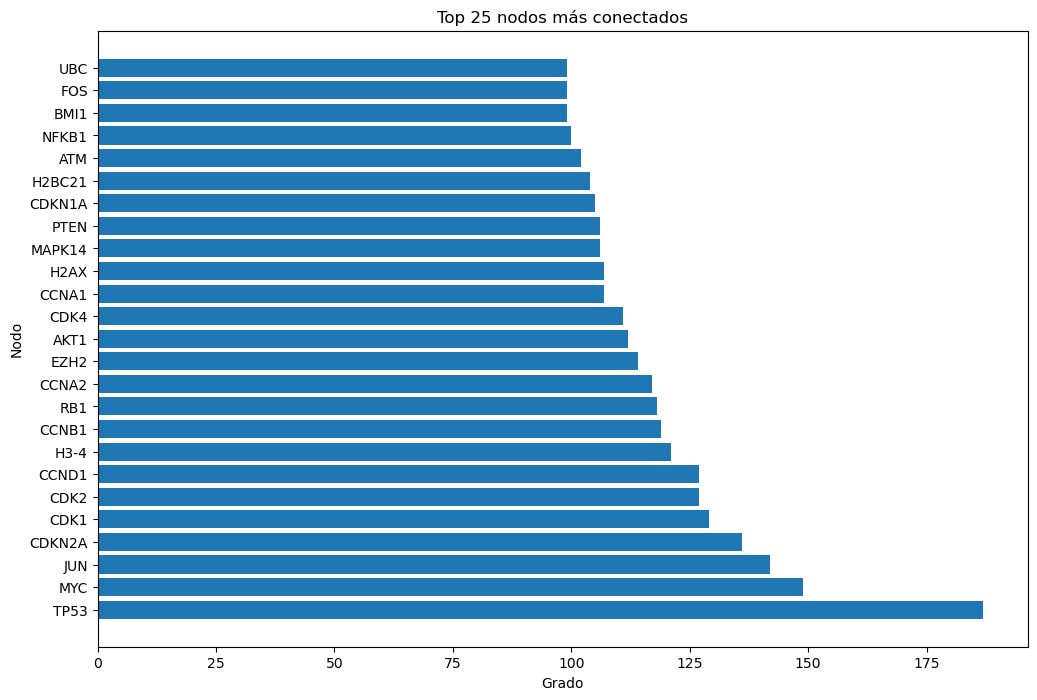

In [37]:
plt.figure(figsize=(12, 8))
plt.barh(nodos, grados)
plt.xlabel('Grado')
plt.ylabel('Nodo')
plt.title('Top 25 nodos más conectados')
plt.show()

Obtener el top 25 de los nodos menos conectados

In [40]:
grado = dict(RED.degree())

In [41]:
top_100_menos_conectados = sorted(grado.items(), key=lambda x: x[1])[:100]

In [42]:
print(f"Los top 100 de los nodos menos conectados son:")
for nodo, grado in top_100_menos_conectados:
    print(f"{nodo} con un grado de {grado}")

Los top 100 de los nodos menos conectados son:
TRAF3IP2 con un grado de 1
TRPM7 con un grado de 1
KIR2DL4 con un grado de 2
TTC1 con un grado de 2
HIPK3 con un grado de 2
ZFP36L2 con un grado de 2
CACNA1D con un grado de 3
HIPK4 con un grado de 3
MCU con un grado de 3
ZFP36L1 con un grado de 4
CAPN2 con un grado de 4
ERF con un grado de 4
HIPK1 con un grado de 4
TRPV4 con un grado de 5
HLA-G con un grado de 5
CAPN1 con un grado de 6
DNAJC7 con un grado de 6
IGFBP7 con un grado de 7
TNIK con un grado de 7
SLC25A31 con un grado de 7
SLC25A5 con un grado de 7
SLC25A6 con un grado de 7
VDAC2 con un grado de 8
VDAC3 con un grado de 8
SLC25A4 con un grado de 8
MINK1 con un grado de 9
DUSP16 con un grado de 10
RRAS2 con un grado de 11
MAP4K4 con un grado de 11
RAD9B con un grado de 12
RAD1 con un grado de 12
TGFB3 con un grado de 13
RRAS con un grado de 13
RASSF5 con un grado de 13
MAPKAPK5 con un grado de 13
VENTX con un grado de 14
FBXW11 con un grado de 14
PPID con un grado de 15
IFNB1 con

Para hacer una gráfica de barras hay que separar los nombres de los nodos y sus grados en dos listas separadas

In [44]:
nodos = [nodo for nodo, grado in top_100_menos_conectados]
grados = [grado for nodo, grado in top_100_menos_conectados]

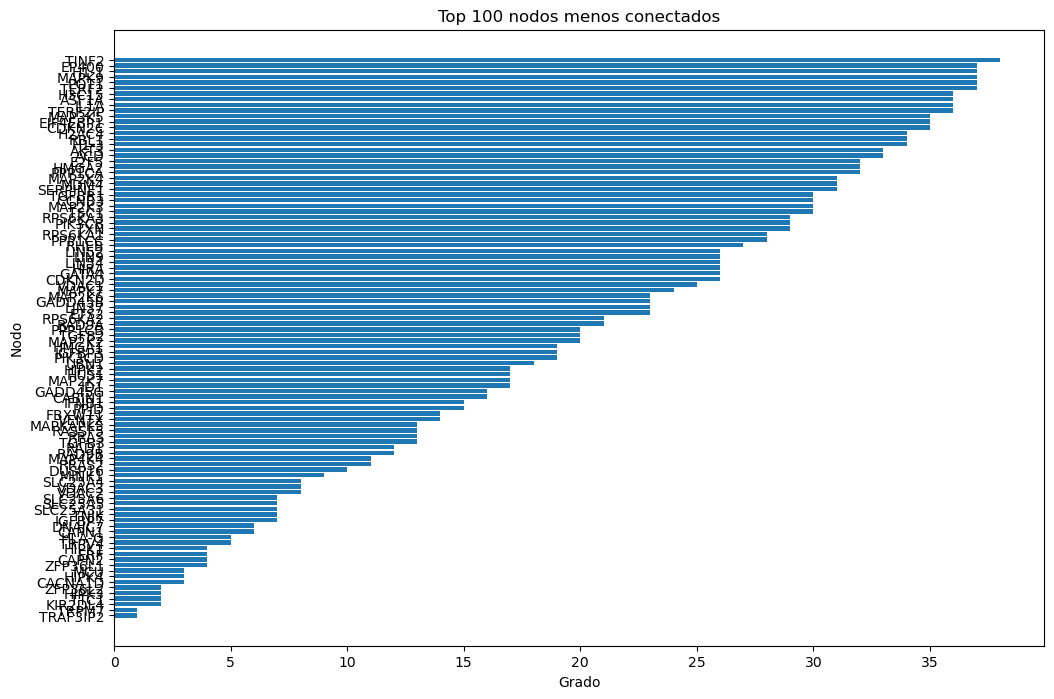

In [45]:
plt.figure(figsize=(12, 8))
plt.barh(nodos, grados)
plt.xlabel('Grado')
plt.ylabel('Nodo')
plt.title('Top 100 nodos menos conectados')
plt.show()

Obtener el top 100 de los nodos mas conectados

In [46]:
grado = dict(RED.degree())

In [47]:
top_100_mas_conectados = sorted(grado.items(), key=lambda x: x[1], reverse=True)[:100]

In [48]:
print(f"Los top 100 de los nodos más conectados son:")
for nodo, grado in top_100_mas_conectados:
    print(f"{nodo} con un grado de {grado}")

Los top 100 de los nodos más conectados son:
TP53 con un grado de 187
MYC con un grado de 149
JUN con un grado de 142
CDKN2A con un grado de 136
CDK1 con un grado de 129
CDK2 con un grado de 127
CCND1 con un grado de 127
H3-4 con un grado de 121
CCNB1 con un grado de 119
RB1 con un grado de 118
CCNA2 con un grado de 117
EZH2 con un grado de 114
AKT1 con un grado de 112
CDK4 con un grado de 111
CCNA1 con un grado de 107
H2AX con un grado de 107
MAPK14 con un grado de 106
PTEN con un grado de 106
CDKN1A con un grado de 105
H2BC21 con un grado de 104
ATM con un grado de 102
NFKB1 con un grado de 100
BMI1 con un grado de 99
FOS con un grado de 99
UBC con un grado de 99
H2BC5 con un grado de 97
RPS27A con un grado de 97
H2BC12 con un grado de 96
H2BC3 con un grado de 96
SIRT1 con un grado de 96
H2BC4 con un grado de 94
H2AC20 con un grado de 94
H2BC14 con un grado de 94
H2AC18 con un grado de 93
H2BC17 con un grado de 93
UBA52 con un grado de 93
H2BC13 con un grado de 92
H2BC11 con un grado

Para hacer una gráfica de barras hay que separar los nombres de los nodos y sus grados en dos listas separadas

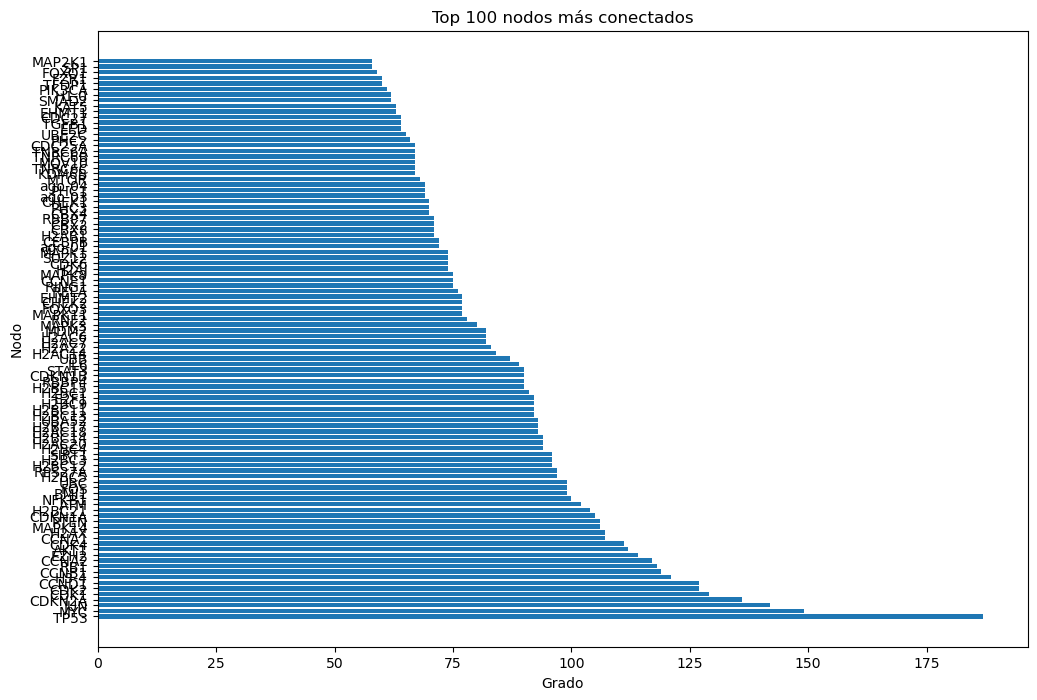

In [49]:
nodos = [nodo for nodo, grado in top_100_mas_conectados]
grados = [grado for nodo, grado in top_100_mas_conectados]
plt.figure(figsize=(12, 8))
plt.barh(nodos, grados)
plt.xlabel('Grado')
plt.ylabel('Nodo')
plt.title('Top 100 nodos más conectados')
plt.show()

Generar una variable que nos permita ver en un plot el comportamiento de los nodos.

In [56]:
Hist_degree = nx.degree(RED)

In [57]:
grados_dict = dict(Hist_degree)

In [58]:
valores, frecuencias = zip(*grados_dict.items())

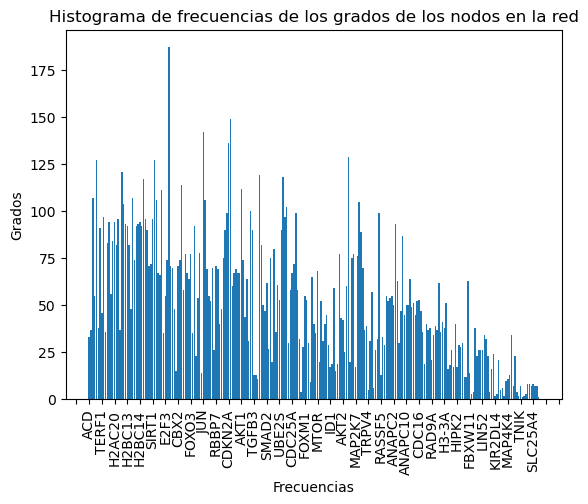

In [71]:
plt.bar(valores, frecuencias)
plt.ylabel('Grados')
plt.xlabel('Frecuencias')
plt.title('Histograma de frecuencias de los grados de los nodos en la red')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.xticks(rotation=90)
plt.show()

In [69]:
Orden_degree = sorted(grados_dict.items(), key=lambda x: x[1], reverse=True)

In [70]:
Orden_degree

[('TP53', 187),
 ('MYC', 149),
 ('JUN', 142),
 ('CDKN2A', 136),
 ('CDK1', 129),
 ('CDK2', 127),
 ('CCND1', 127),
 ('H3-4', 121),
 ('CCNB1', 119),
 ('RB1', 118),
 ('CCNA2', 117),
 ('EZH2', 114),
 ('AKT1', 112),
 ('CDK4', 111),
 ('CCNA1', 107),
 ('H2AX', 107),
 ('MAPK14', 106),
 ('PTEN', 106),
 ('CDKN1A', 105),
 ('H2BC21', 104),
 ('ATM', 102),
 ('NFKB1', 100),
 ('BMI1', 99),
 ('FOS', 99),
 ('UBC', 99),
 ('H2BC5', 97),
 ('RPS27A', 97),
 ('H2BC12', 96),
 ('H2BC3', 96),
 ('SIRT1', 96),
 ('H2BC4', 94),
 ('H2AC20', 94),
 ('H2BC14', 94),
 ('H2AC18', 93),
 ('H2BC17', 93),
 ('UBA52', 93),
 ('H2BC13', 92),
 ('H2BC11', 92),
 ('H2BC9', 92),
 ('E2F1', 92),
 ('H2BC1', 91),
 ('H2BC15', 90),
 ('RBBP4', 90),
 ('CDKN1B', 90),
 ('STAT3', 90),
 ('IL6', 89),
 ('UBB', 87),
 ('H2AC14', 84),
 ('H2AZ2', 83),
 ('H2AC7', 82),
 ('H2AC6', 82),
 ('MDM2', 82),
 ('MAPK3', 80),
 ('RNF2', 78),
 ('MAPK11', 77),
 ('FOXO3', 77),
 ('CHEK2', 77),
 ('EHMT2', 77),
 ('RELA', 76),
 ('RING1', 75),
 ('CCNE1', 75),
 ('MAPK8', 75),


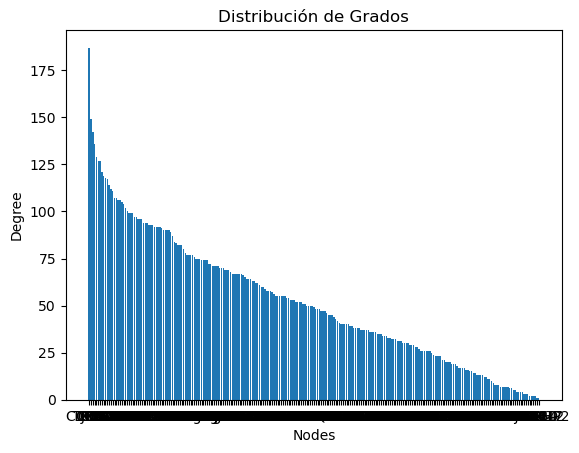

In [82]:
nodes = [x[0] for x in Orden_degree]
degrees = [x[1] for x in Orden_degree]
plt.bar(nodes, degrees)
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.title('Distribución de Grados')
plt.show()

Centralidad de grado

In [80]:
Degree_centrality = nx.degree_centrality(RED)

In [81]:
Degree_centrality

{'ACD': 0.13306451612903225,
 'TERF2': 0.14919354838709678,
 'CCNA1': 0.4314516129032258,
 'NBN': 0.2217741935483871,
 'CDK2': 0.5120967741935484,
 'TINF2': 0.1532258064516129,
 'H2BC1': 0.36693548387096775,
 'TERF1': 0.18548387096774194,
 'H2BC5': 0.3911290322580645,
 'TERF2IP': 0.14516129032258063,
 'H2AZ2': 0.3346774193548387,
 'H2BC4': 0.3790322580645161,
 'MRE11': 0.22580645161290322,
 'H2AC14': 0.3387096774193548,
 'H2AC20': 0.3790322580645161,
 'H2AC7': 0.33064516129032256,
 'H2BC12': 0.3870967741935484,
 'POT1': 0.14919354838709678,
 'H3-4': 0.4879032258064516,
 'H2BC21': 0.4193548387096774,
 'H2AC18': 0.375,
 'H2BC13': 0.3709677419354839,
 'H2AC6': 0.33064516129032256,
 'RAD50': 0.1935483870967742,
 'H2AX': 0.4314516129032258,
 'H2AJ': 0.29838709677419356,
 'H2BC11': 0.3709677419354839,
 'H2BC17': 0.375,
 'H2BC14': 0.3790322580645161,
 'H2BC9': 0.3709677419354839,
 'CCNA2': 0.47177419354838707,
 'H2BC3': 0.3870967741935484,
 'H2BC15': 0.3629032258064516,
 'H2AB1': 0.2862903225

In [78]:
DegreeConn = nx.average_degree_connectivity(RED)

In [79]:
DegreeConn

{33: 81.81818181818181,
 37: 78.25405405405405,
 107: 74.17289719626169,
 55: 80.13636363636364,
 127: 70.33858267716535,
 38: 81.70394736842105,
 91: 78.86813186813187,
 46: 87.69565217391305,
 97: 77.05154639175258,
 36: 76.75,
 83: 77.10843373493977,
 94: 78.10992907801419,
 56: 80.78571428571429,
 84: 77.45238095238095,
 82: 77.41463414634147,
 96: 78.98263888888889,
 121: 75.11570247933884,
 104: 76.99038461538461,
 93: 76.14695340501792,
 92: 78.17391304347827,
 48: 79.84027777777777,
 74: 75.55743243243244,
 117: 69.43589743589743,
 90: 74.90277777777777,
 71: 78.03873239436619,
 72: 74.49305555555556,
 106: 69.93867924528301,
 67: 80.35820895522389,
 66: 77.36363636363636,
 111: 73.78378378378379,
 35: 79.13333333333334,
 187: 57.711229946524064,
 70: 78.95714285714286,
 15: 67.7,
 114: 78.02631578947368,
 58: 77.27011494252874,
 77: 77.10064935064935,
 64: 76.46354166666667,
 23: 72.07608695652173,
 54: 73.62962962962963,
 78: 76.26923076923077,
 14: 82.85714285714286,
 142: 6

#### Calcular el coeficiente de agrupamiento local del nodo

nx.clustering es una función de NetworkX que se utiliza para calcular la coeficiente de agrupamiento local (LOC) de una red. El LOC se calcula para cada nodo de la red y mide la proporción de nodos vecinos del nodo en cuestión que están conectados entre ellos. En otras palabras, el LOC mide la conectividad entre los vecinos de un nodo determinado.

Para calcular el LOC de un nodo, se cuenta el número de enlaces que realmente existen entre los vecinos de ese nodo, y se divide ese número entre el número total posible de enlaces entre los vecinos. El resultado es un valor entre 0 y 1 que indica qué tan conectados están los vecinos del nodo. 

El Coeficiente de Agrupamiento Local es una medida importante porque puede utilizarse para analizar la topología de una red y entender mejor su organización. Por ejemplo, puede utilizarse para identificar nodos importantes o de alto grado en una red, o para detectar la presencia de comunidades o grupos de nodos altamente interconectados.



#### Este metodo me puede servir mas adelante para el objetivo 4 del proyecto y hacer el Clustering. En este objetivo no me interesa agrupar los nodos.

In [50]:
loc = nx.clustering(RED)

In [51]:
print(f"El coeficiente de agrupamiento local del nodo 'n' es: {loc}")

El coeficiente de agrupamiento local del nodo 'n' es: {'ACD': 0.9545454545454546, 'TERF2': 0.8723723723723724, 'CCNA1': 0.4149180038793864, 'NBN': 0.6895622895622896, 'CDK2': 0.3845769278840145, 'TINF2': 0.9075391180654339, 'H2BC1': 0.6102564102564103, 'TERF1': 0.8173913043478261, 'H2BC5': 0.5850515463917526, 'TERF2IP': 0.8984126984126984, 'H2AZ2': 0.6350279165442256, 'H2BC4': 0.6048959048272706, 'MRE11': 0.687012987012987, 'H2AC14': 0.6351118760757315, 'H2AC20': 0.5831617478837795, 'H2AC7': 0.6458897922312556, 'H2BC12': 0.5868421052631579, 'POT1': 0.8993993993993994, 'H3-4': 0.45633608815426996, 'H2BC21': 0.54462285287528, 'H2AC18': 0.5897615708274895, 'H2BC13': 0.617056856187291, 'H2AC6': 0.6476964769647696, 'RAD50': 0.749113475177305, 'H2AX': 0.5261858578733909, 'H2AJ': 0.7064050351721585, 'H2BC11': 0.6204013377926422, 'H2BC17': 0.5998129967274427, 'H2BC14': 0.6048959048272706, 'H2BC9': 0.6053511705685619, 'CCNA2': 0.3986147951665193, 'H2BC3': 0.5912280701754385, 'H2BC15': 0.6197253

Crear la RED en una variable

In [48]:
G = RED

In [ ]:
# Calcula el LOC para todos los nodos de la RED

In [52]:
for node in G.nodes:
    loc = nx.clustering(G, node)
    print(f"El coeficiente de agrupamiento local del nodo '{node}' es: {loc}")

El coeficiente de agrupamiento local del nodo 'ACD' es: 0.9545454545454546
El coeficiente de agrupamiento local del nodo 'TERF2' es: 0.8723723723723724
El coeficiente de agrupamiento local del nodo 'CCNA1' es: 0.4149180038793864
El coeficiente de agrupamiento local del nodo 'NBN' es: 0.6895622895622896
El coeficiente de agrupamiento local del nodo 'CDK2' es: 0.3845769278840145
El coeficiente de agrupamiento local del nodo 'TINF2' es: 0.9075391180654339
El coeficiente de agrupamiento local del nodo 'H2BC1' es: 0.6102564102564103
El coeficiente de agrupamiento local del nodo 'TERF1' es: 0.8173913043478261
El coeficiente de agrupamiento local del nodo 'H2BC5' es: 0.5850515463917526
El coeficiente de agrupamiento local del nodo 'TERF2IP' es: 0.8984126984126984
El coeficiente de agrupamiento local del nodo 'H2AZ2' es: 0.6350279165442256
El coeficiente de agrupamiento local del nodo 'H2BC4' es: 0.6048959048272706
El coeficiente de agrupamiento local del nodo 'MRE11' es: 0.687012987012987
El 

Crea un directorio/diccionario que relacione los nodos con sus valores de LOC

In [53]:
loc_dict = {}
for node in G.nodes:
    loc = nx.clustering(G, node)
    loc_dict[node] = loc

Para graficar los valores de LOC

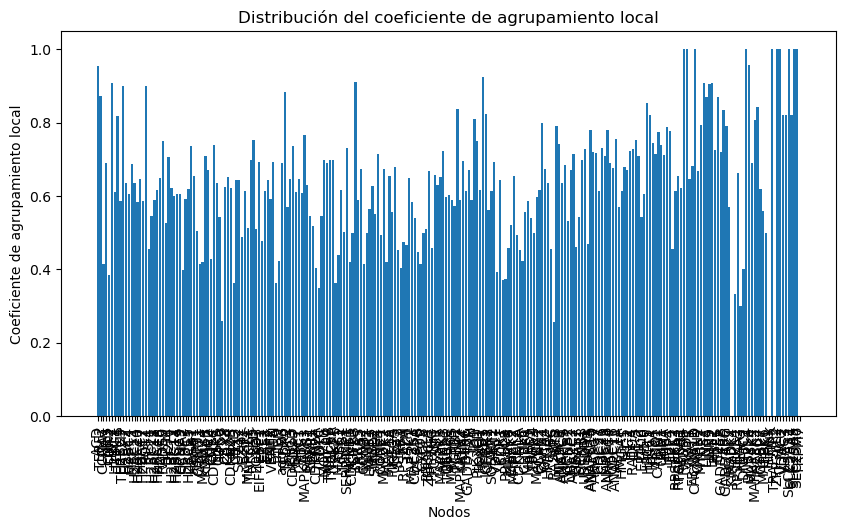

In [54]:
plt.figure(figsize=(10,5))
nodes = list(loc_dict.keys())
values = list(loc_dict.values())
plt.bar(nodes, values)
plt.xlabel('Nodos')
plt.ylabel('Coeficiente de agrupamiento local')
plt.title('Distribución del coeficiente de agrupamiento local')
plt.xticks(rotation=90)
plt.show()